This was all generated with github copilot

update the above graph to show high concentration of democrats with darker blue, and higher concentration of republicans with a darker red, and countries that had a mixture to show a gradient shade between red and blue. 

I later asked copilot to exclude Alaska and Hawaii to focus only on the 48 continental states.

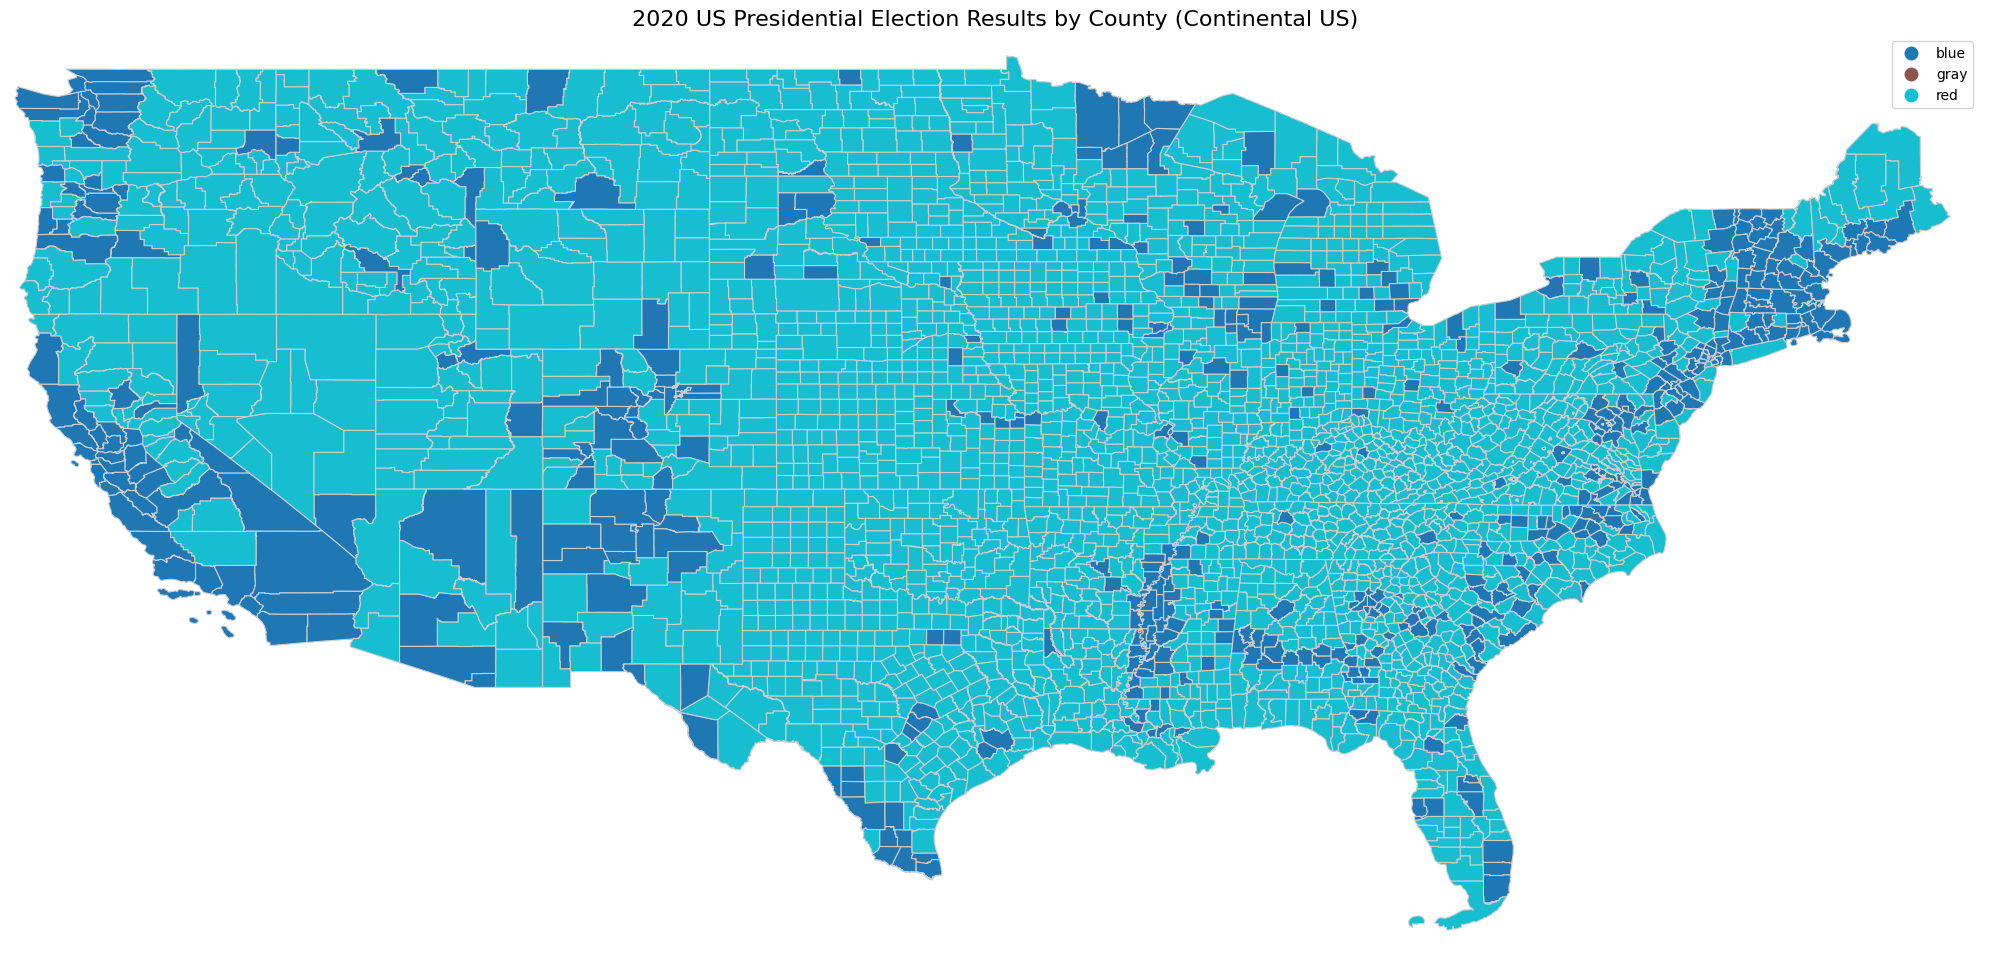

In [4]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import requests
import io

# Download county-level election data
url = "https://raw.githubusercontent.com/tonmcg/US_County_Level_Election_Results_08-20/master/2020_US_County_Level_Presidential_Results.csv"
election_df = pd.read_csv(url)

# Download US county shapefile
counties_url = "https://www2.census.gov/geo/tiger/TIGER2020/COUNTY/tl_2020_us_county.zip"
counties = gpd.read_file(counties_url)

# Ensure both 'GEOID' and 'county_fips' are strings
counties['GEOID'] = counties['GEOID'].astype(str)
election_df['county_fips'] = election_df['county_fips'].astype(str).str.zfill(5)

# Merge election data with county shapefile
merged = counties.merge(election_df, left_on='GEOID', right_on='county_fips', how='left')

# Calculate percentage of votes for each party
merged['total_votes'] = merged['votes_gop'] + merged['votes_dem']
merged['per_gop'] = merged['votes_gop'] / merged['total_votes']
merged['per_dem'] = merged['votes_dem'] / merged['total_votes']

# Create a color column
merged['color'] = merged.apply(lambda row: 'red' if row['per_gop'] > row['per_dem'] else 'blue' if pd.notnull(row['per_gop']) else 'gray', axis=1)

# Filter out Alaska (02) and Hawaii (15)
merged_continental = merged[~merged['STATEFP'].isin(['02', '15'])]

# Create the map
fig, ax = plt.subplots(figsize=(20, 12))
merged_continental.plot(column='color', ax=ax, legend=True, edgecolor='0.8', linewidth=0.8, missing_kwds={'color': 'gray'})

# Remove axes
ax.axis('off')

# Add a title
plt.title('2020 US Presidential Election Results by County (Continental US)', fontsize=16)

# Set the extent to focus on continental US
ax.set_xlim(-125, -66)
ax.set_ylim(24, 50)

# Show the plot
plt.tight_layout()
plt.show()

update the above graph to show high concentration of democrats with darker blue, and higher concentration of republicans with a darker red, and countries that had a mixture to show a gradient shade between red and blue.

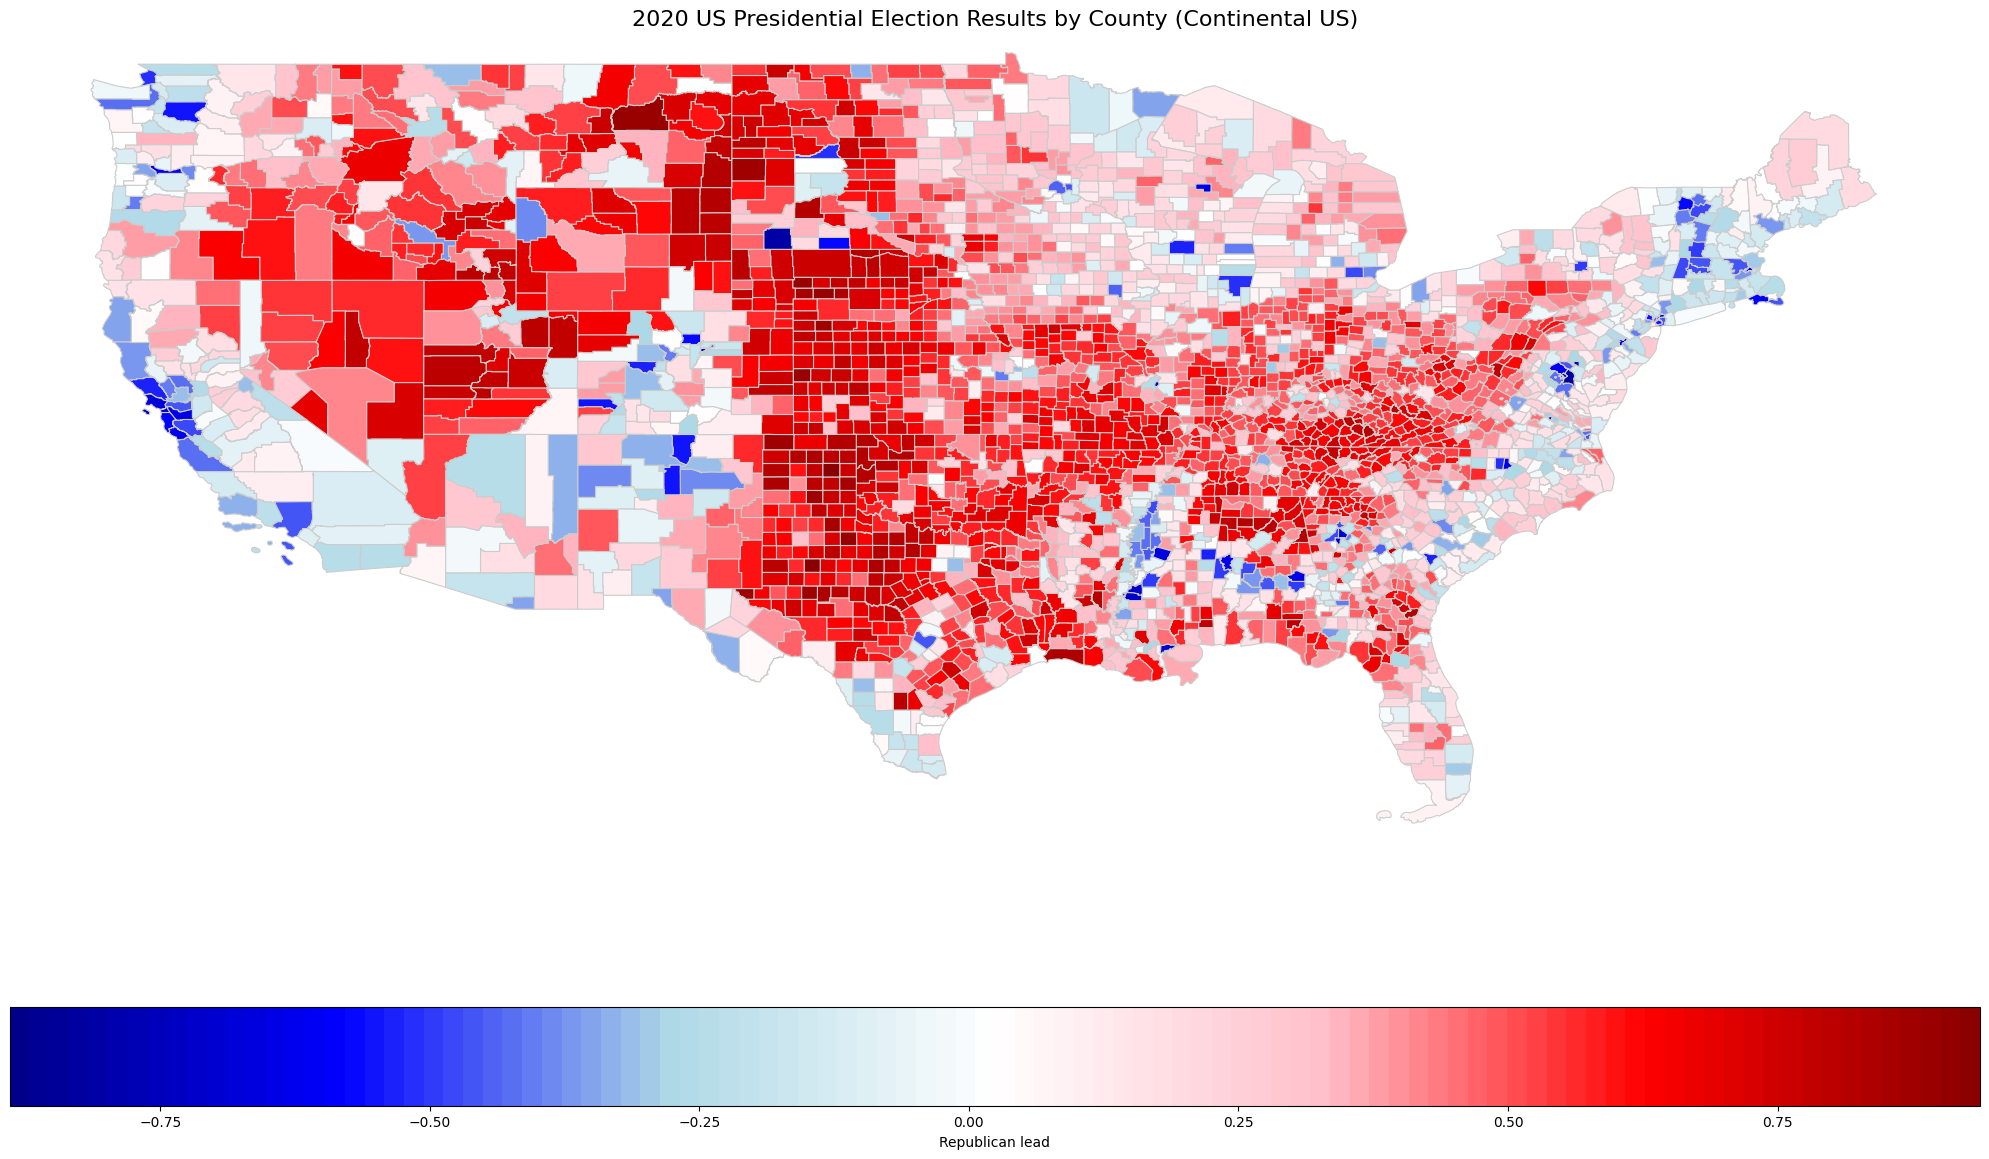

In [5]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

# Download county-level election data
url = "https://raw.githubusercontent.com/tonmcg/US_County_Level_Election_Results_08-20/master/2020_US_County_Level_Presidential_Results.csv"
election_df = pd.read_csv(url)

# Download US county shapefile
counties_url = "https://www2.census.gov/geo/tiger/TIGER2020/COUNTY/tl_2020_us_county.zip"
counties = gpd.read_file(counties_url)

# Ensure both 'GEOID' and 'county_fips' are strings
counties['GEOID'] = counties['GEOID'].astype(str)
election_df['county_fips'] = election_df['county_fips'].astype(str).str.zfill(5)

# Merge election data with county shapefile
merged = counties.merge(election_df, left_on='GEOID', right_on='county_fips', how='left')

# Calculate percentage of votes for each party
merged['total_votes'] = merged['votes_gop'] + merged['votes_dem']
merged['per_gop'] = merged['votes_gop'] / merged['total_votes']
merged['per_dem'] = merged['votes_dem'] / merged['total_votes']

# Create a color value column (0 for full Democrat, 1 for full Republican)
merged['color_value'] = (merged['per_gop'] - 0.5) * 2

# Filter out Alaska (02) and Hawaii (15)
merged_continental = merged[~merged['STATEFP'].isin(['02', '15'])]

# Create a custom colormap
colors = ['darkblue', 'blue', 'lightblue', 'white', 'pink', 'red', 'darkred']
n_bins = 100
cmap = LinearSegmentedColormap.from_list('custom', colors, N=n_bins)

# Create the map
fig, ax = plt.subplots(figsize=(20, 12))
merged_continental.plot(column='color_value', ax=ax, cmap=cmap, 
                        legend=True, edgecolor='0.8', linewidth=0.8,
                        missing_kwds={'color': 'gray'}, 
                        legend_kwds={'label': 'Republican lead', 'orientation': 'horizontal'})

# Remove axes
ax.axis('off')

# Add a title
plt.title('2020 US Presidential Election Results by County (Continental US)', fontsize=16)

# Set the extent to focus on continental US
ax.set_xlim(-125, -66)
ax.set_ylim(24, 50)

# Show the plot
plt.tight_layout()
plt.show()

you should ask copilot for anything based on public data such as polls, census, or city data